In [7]:
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import HTML 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
train_gen = ImageDataGenerator(rescale=1./255, rotation_range=10, horizontal_flip=True)
train_generator = train_gen.flow_from_directory("dataset/train", target_size=(256,256), batch_size=32, class_mode='sparse', save_to_dir='augmentedimages')


Found 1506 images belonging to 3 classes.


In [3]:
validation = ImageDataGenerator(rescale=1./255, rotation_range=10, horizontal_flip=True)
validation_gen = validation.flow_from_directory("dataset/val", target_size=(256,256), batch_size=32, class_mode='sparse')

Found 215 images belonging to 3 classes.


In [4]:
test= ImageDataGenerator(rescale=1./255, rotation_range=10, horizontal_flip=True)
test_gen = test.flow_from_directory("dataset/test", target_size=(256,256), batch_size=32, class_mode='sparse')

Found 431 images belonging to 3 classes.


In [5]:
model = models.Sequential([
    layers.InputLayer(input_shape=(256,256,3)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [8]:
model_earlystop = EarlyStopping(monitor='val_accuracy',
                                verbose=1,
                                min_delta=0.01,
                                patience=5,
                                mode='auto')

model_history = model.fit(train_generator, 
                          steps_per_epoch=47, 
                          batch_size=32, 
                          validation_data=validation_gen, 
                          validation_steps=6,
                          verbose=1,
                          epochs=20,
                          callbacks=model_earlystop)

Epoch 1/20


47/47 [==============================] - 251s 5s/step - loss: 0.9153 - accuracy: 0.4864 - val_loss: 0.8480 - val_accuracy: 0.4948
Epoch 2/20
47/47 [==============================] - 299s 6s/step - loss: 0.6245 - accuracy: 0.7178 - val_loss: 0.4596 - val_accuracy: 0.8646
Epoch 3/20
47/47 [==============================] - 301s 6s/step - loss: 0.3276 - accuracy: 0.8779 - val_loss: 0.3155 - val_accuracy: 0.8750
Epoch 4/20
47/47 [==============================] - 232s 5s/step - loss: 0.2389 - accuracy: 0.9037 - val_loss: 0.2082 - val_accuracy: 0.9323
Epoch 5/20
47/47 [==============================] - 200s 4s/step - loss: 0.2151 - accuracy: 0.9077 - val_loss: 0.1786 - val_accuracy: 0.9323
Epoch 6/20
47/47 [==============================] - 205s 4s/step - loss: 0.1725 - accuracy: 0.9342 - val_loss: 0.1934 - val_accuracy: 0.9115
Epoch 7/20
47/47 [==============================] - 197s 4s/step - loss: 0.1630 - accuracy: 0.9335 - val_loss: 0.1730 - val_accuracy: 0.9375
Epoch 8/20


In [9]:
score = model.evaluate(test_gen)

14/14 [==============================] - 28s 2s/step - loss: 0.2145 - accuracy: 0.9304


In [10]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

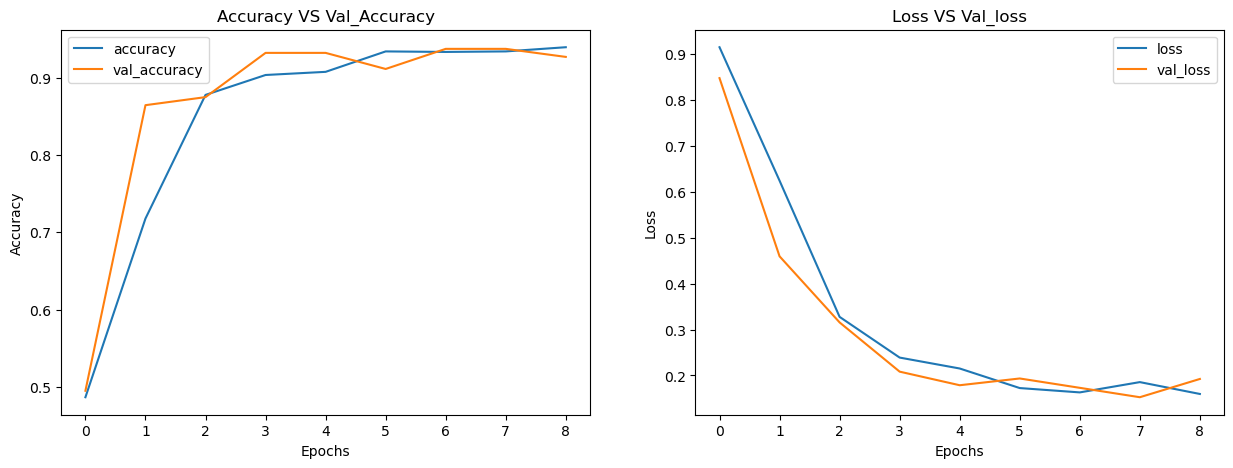

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label='val_accuracy')
plt.title("Accuracy VS Val_Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['val_loss'], label='val_loss')
plt.title("Loss VS Val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [12]:
class_names = list(train_generator.class_indices.keys())
def predict(model,img):
    img_array = img_to_array(images[i])
    img_array = tf.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    predict_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predict_class, confidence

1/1 [==============================] - 0s 66ms/step


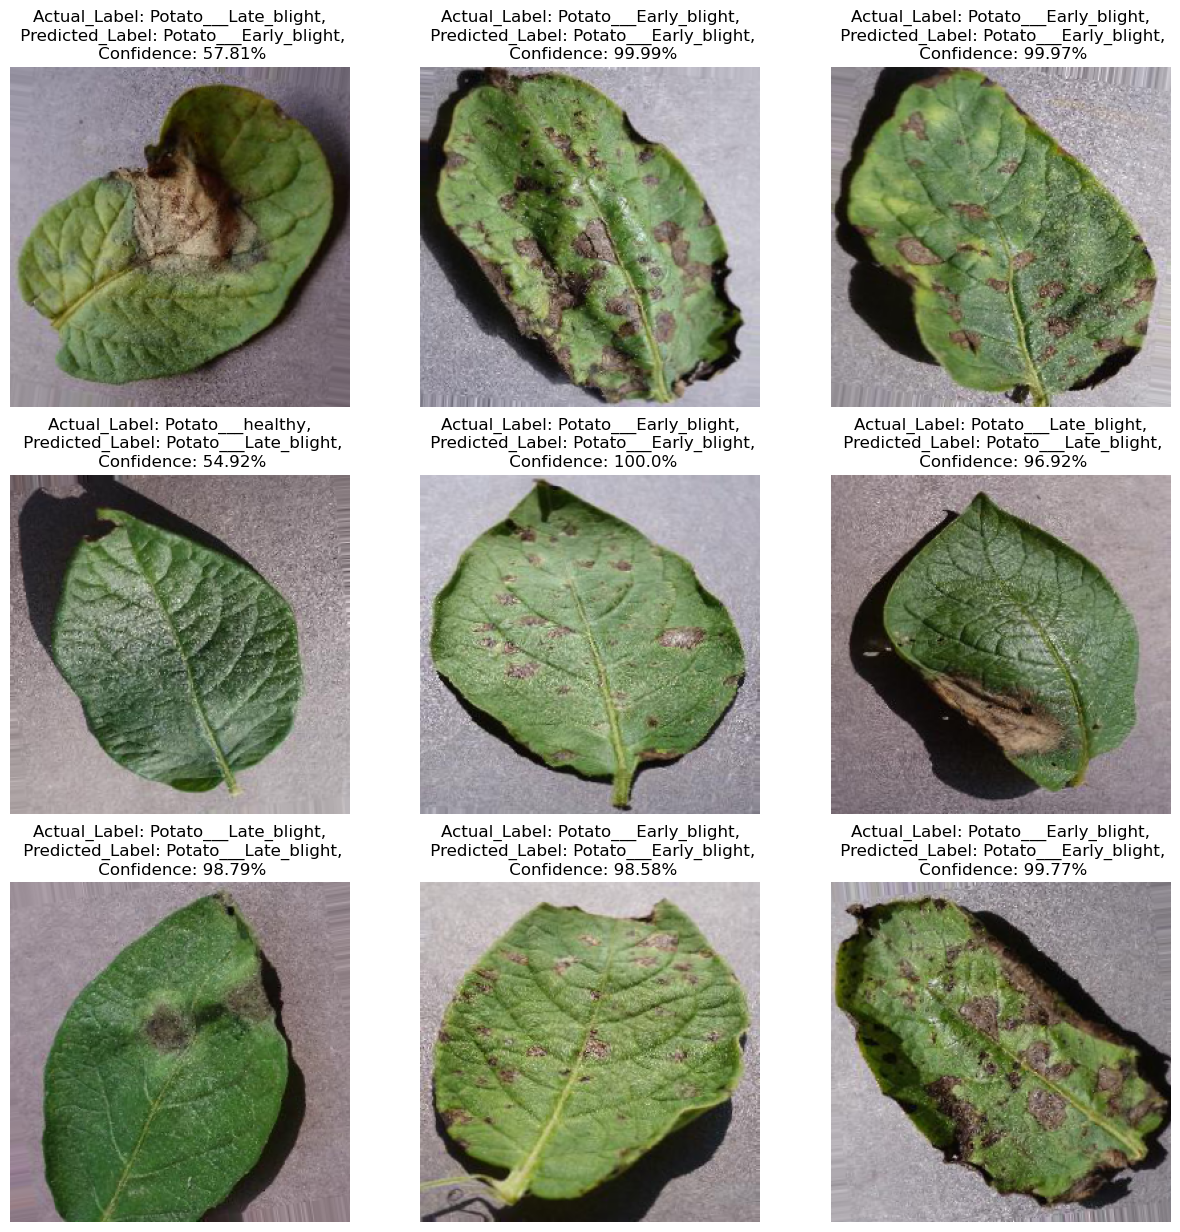

In [13]:
plt.figure(figsize=(15,15))
for images, labels in test_gen:
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i])
        predict_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]
        plt.title("Actual_Label: {0},\n Predicted_Label: {1},\n Confidence: {2}%".format(actual_class, predict_class, confidence))
        plt.axis('off')
    break
plt.show()

In [14]:
model.save("../potato.h5")